In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
# od.download("https://www.kaggle.com/datasets/imgowthamg/car-price")
od.download("https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/data")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zhenweipan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge


100%|██████████| 429k/429k [00:00<00:00, 280MB/s]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='colorblind')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data_set = pd.read_csv('/content/car-price-prediction-challenge/car_price_prediction.csv')
data_set.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
data_set.shape

(19237, 18)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
data = data_set.copy()
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
# we can see that the ID field is useless
data.drop(columns='ID', inplace=True)
data.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [ ]:
# we have to rename some columns to make our work more easy
data.rename(columns={'Prod. year': 'Prod_year'}, inplace=True)
data.rename(columns={'Leather interior': 'Leather_interior'}, inplace=True)
data.rename(columns={'Fuel type': 'Fuel_type'}, inplace=True)
data.rename(columns={'Engine volume': 'Engine_volume'}, inplace=True)
data.rename(columns={'Gear box type': 'Gear_box_type'}, inplace=True)
data.rename(columns={'Drive wheels': 'Drive_wheels'}, inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)
data.shape  # he new shape is (15725, 17)

(15725, 17)

In [ ]:
missing = data.isnull().sum()
missing

,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod_year,0
Category,0
Leather_interior,0
Fuel_type,0
Engine_volume,0
Mileage,0


In [ ]:
# we will replace the '-' with null
data['Levy'].replace({'-':np.nan}, inplace = True)
# we have to convert the type of the Levy column  to float
data['Levy'] = data['Levy'].astype('float64')

In [ ]:
data = data[data['Price'] > 500]
data.shape

(14799, 17)

In [ ]:
data['Turbo_engine'] = data['Engine_volume'].str.contains('Turbo')
data['Engine_volume'] = data['Engine_volume'].str.slice(0,3)
data['Engine_volume'] = data['Engine_volume'].astype('float64')

In [ ]:
data.rename(columns={'Mileage':'Mileage/km'}, inplace=True)
data['Mileage/km'] = data['Mileage/km'].str.strip('km')
data['Mileage/km'] = data['Mileage/km'].astype('int64')

In [ ]:
data['Cylinders'] = data['Cylinders'].astype('int64')

In [ ]:
# the column Doors has wrong values like 04-May and 02-Mar
# and we have to change its type
data['Doors'].replace({'04-May':4, '02-Mar': 2, '>5':5}, inplace = True)
data['Doors'] = data['Doors'].astype('int64')

In [ ]:
categorical_col = data.select_dtypes(['object', 'boolean'])
categorical_col.head(2)

,Manufacturer,Model,Category,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels,Wheel,Color,Turbo_engine
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver,False
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black,False


In [ ]:
numerical_col = data.select_dtypes(['int', 'float'])
numerical_col.head(2)

,Price,Levy,Prod_year,Engine_volume,Mileage/km,Cylinders,Doors,Airbags
0,13328,1399.0,2010,3.5,186005,6,4,12
1,16621,1018.0,2011,3.0,192000,6,4,8


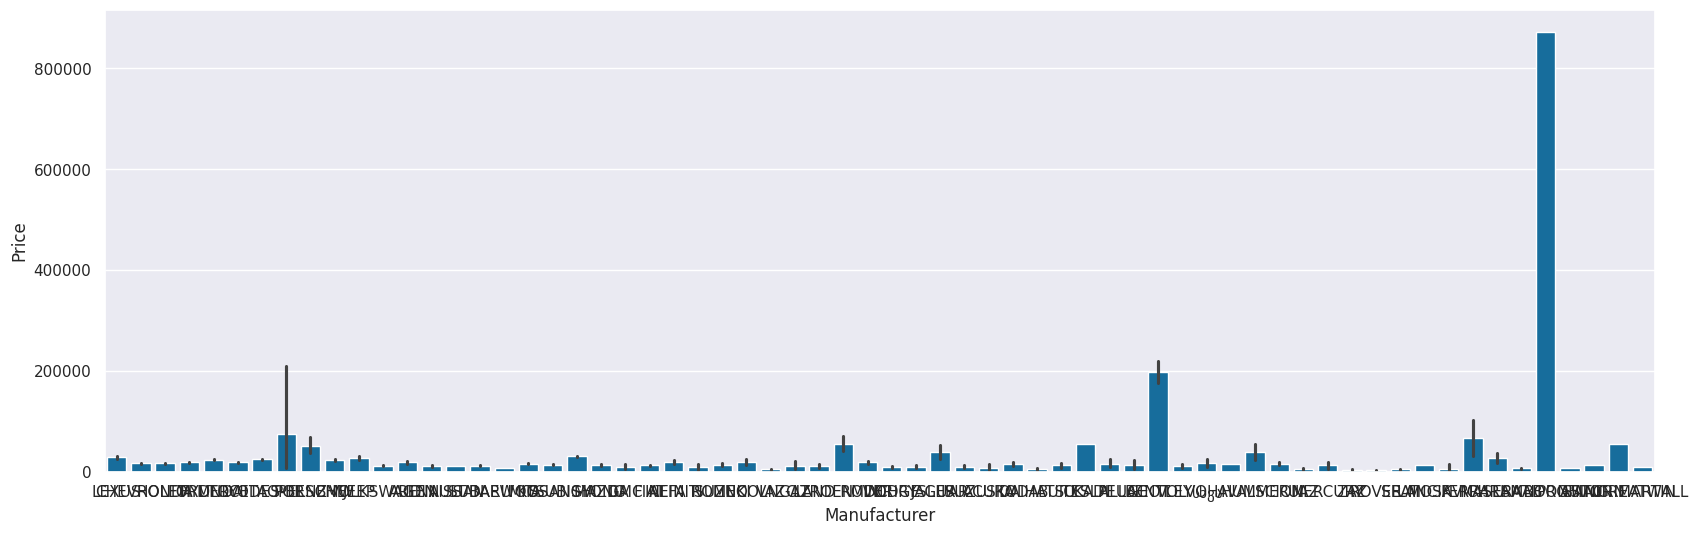

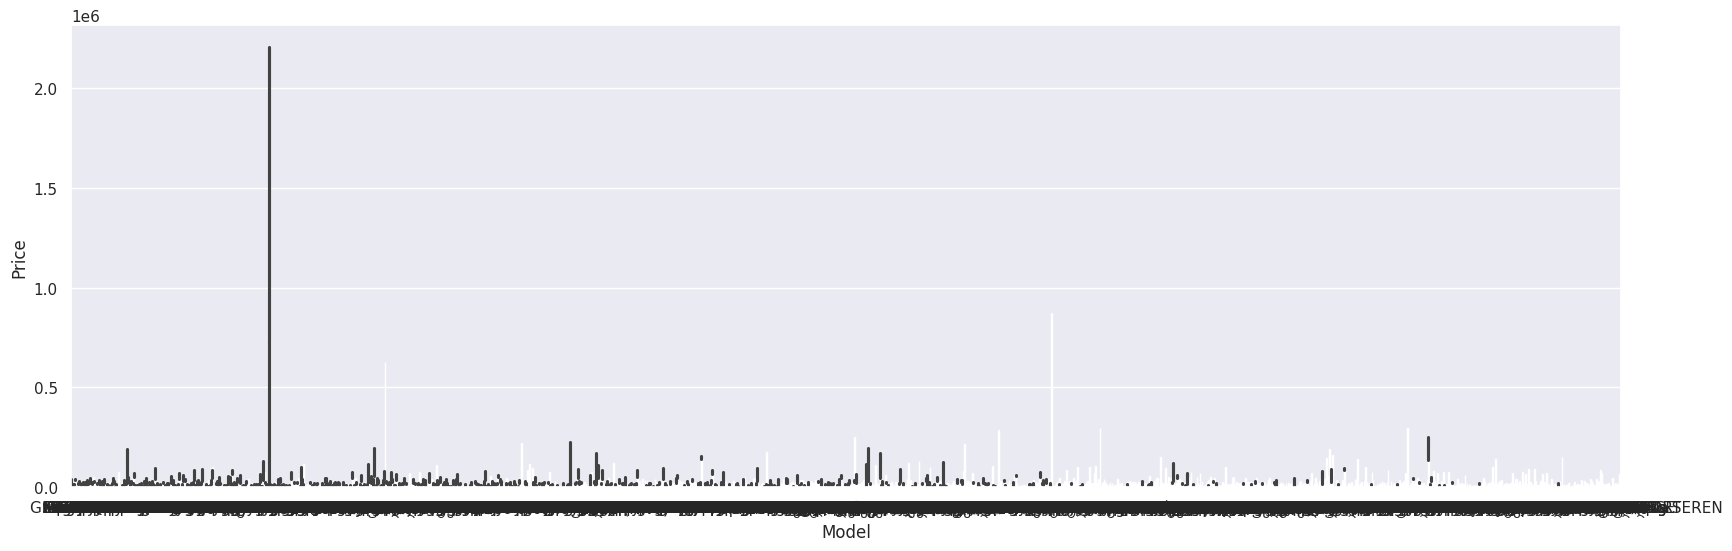

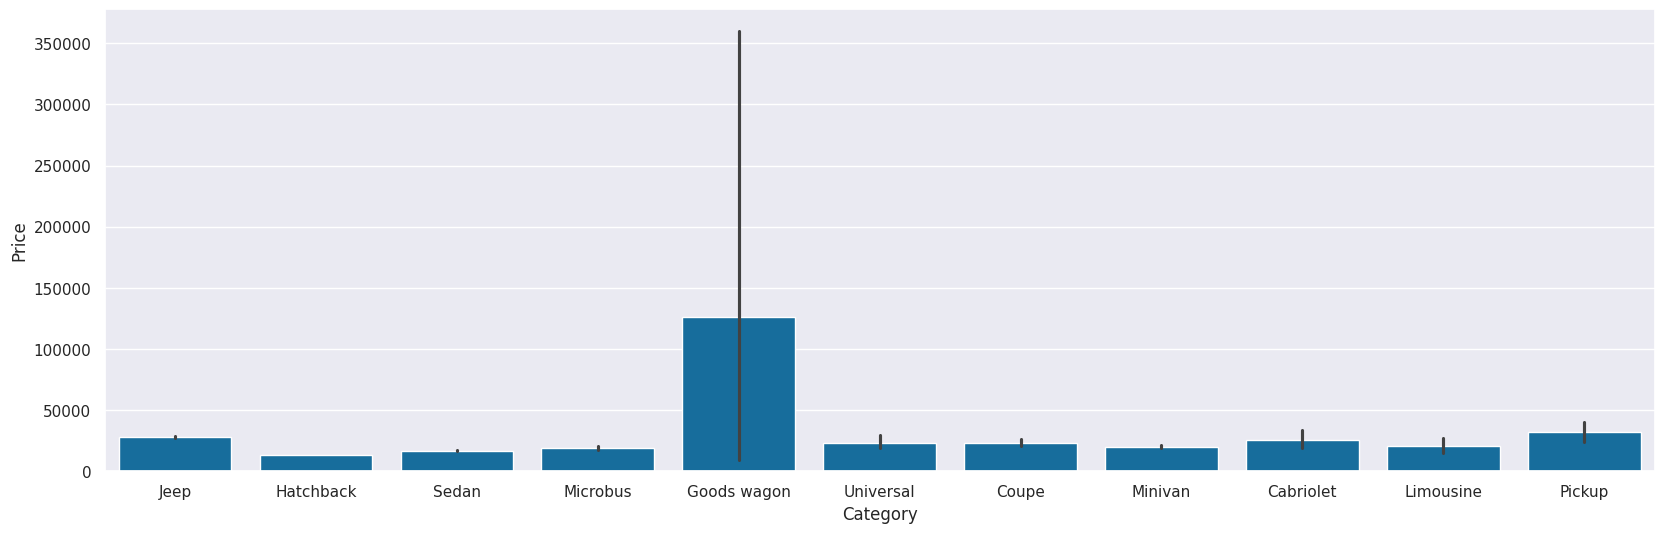

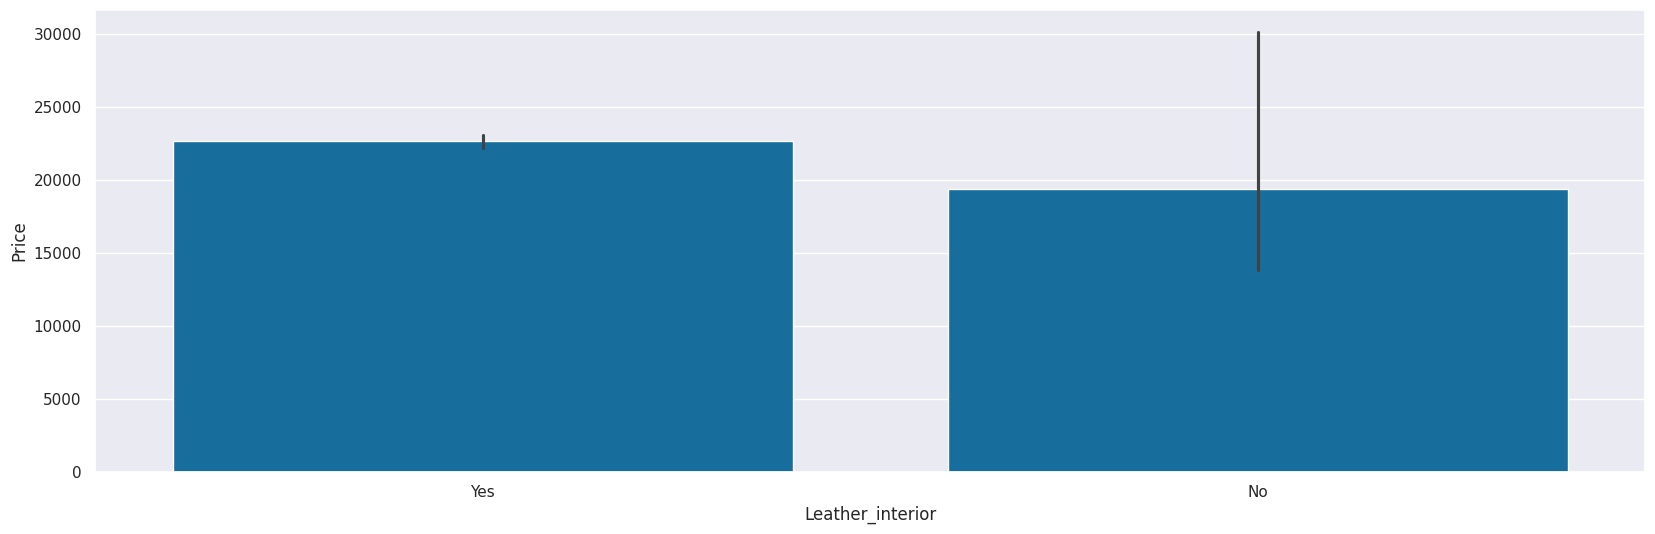

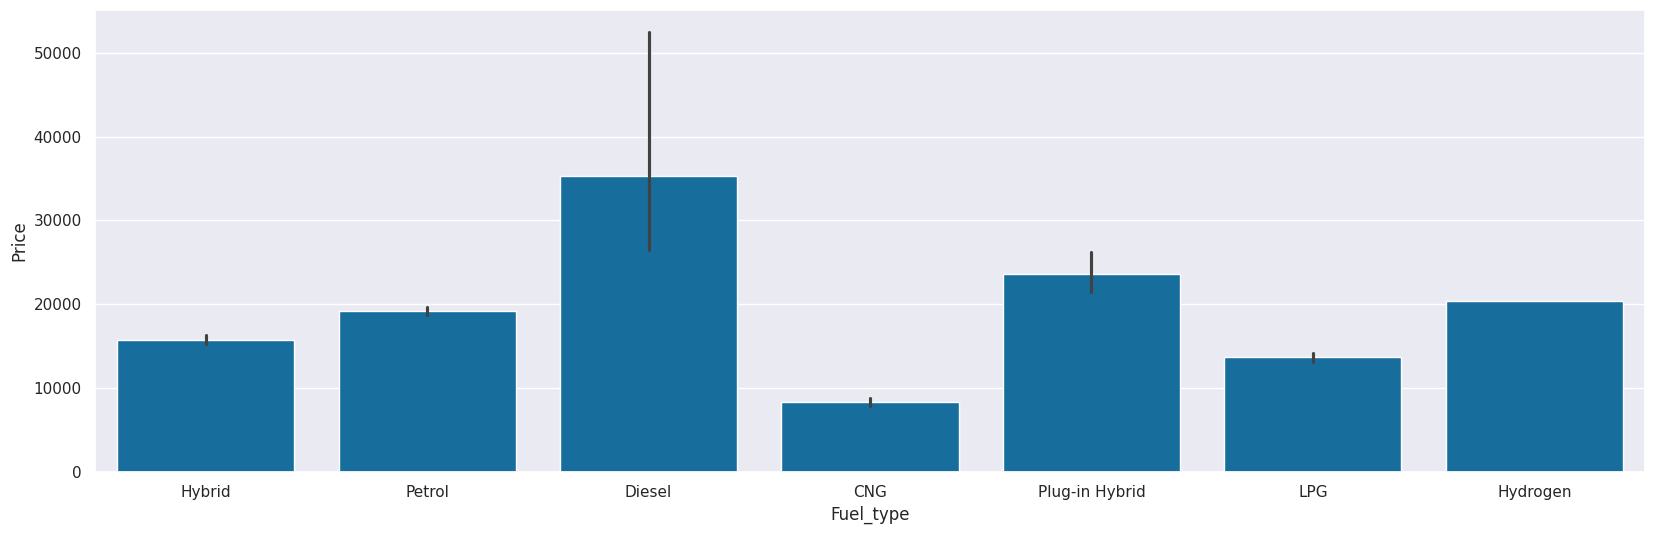

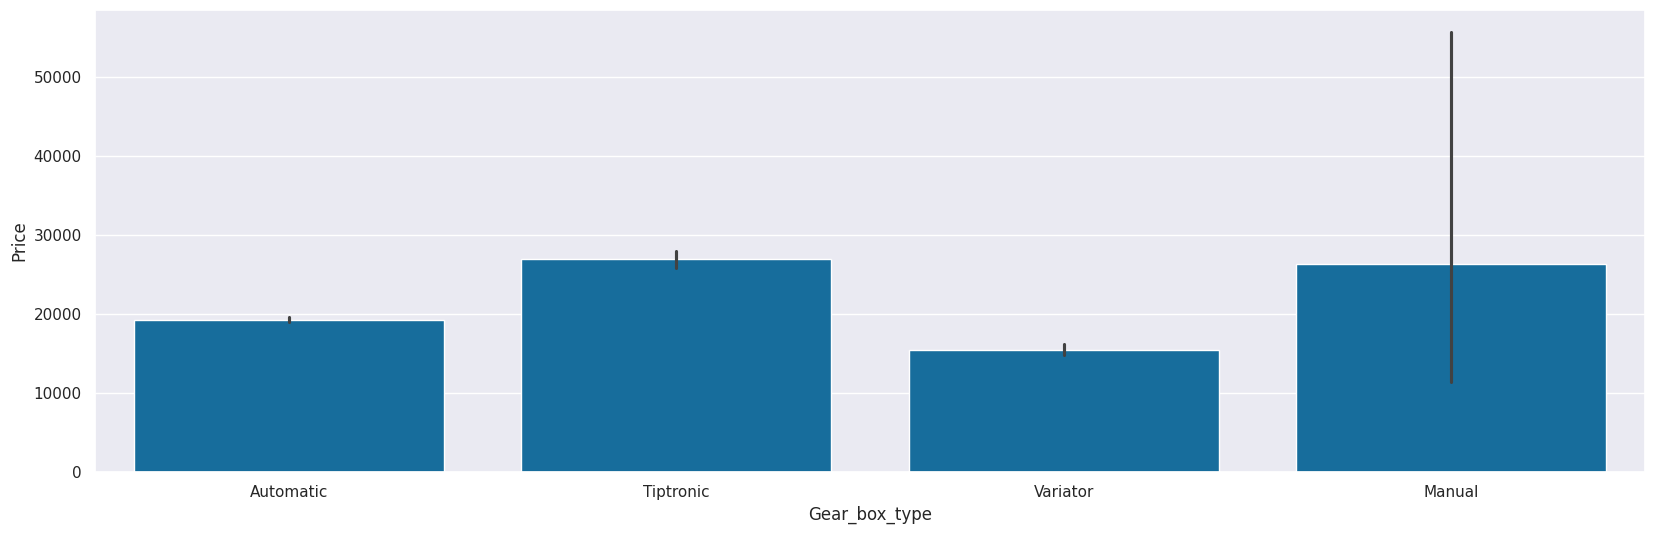

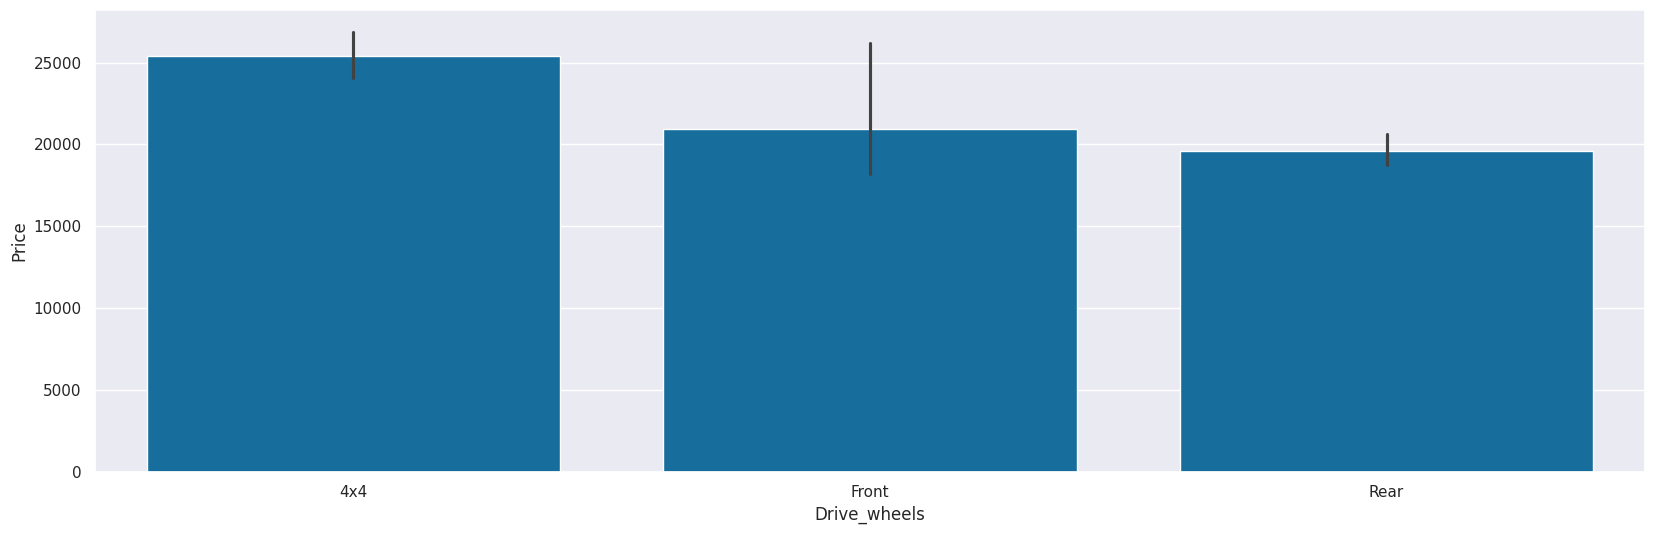

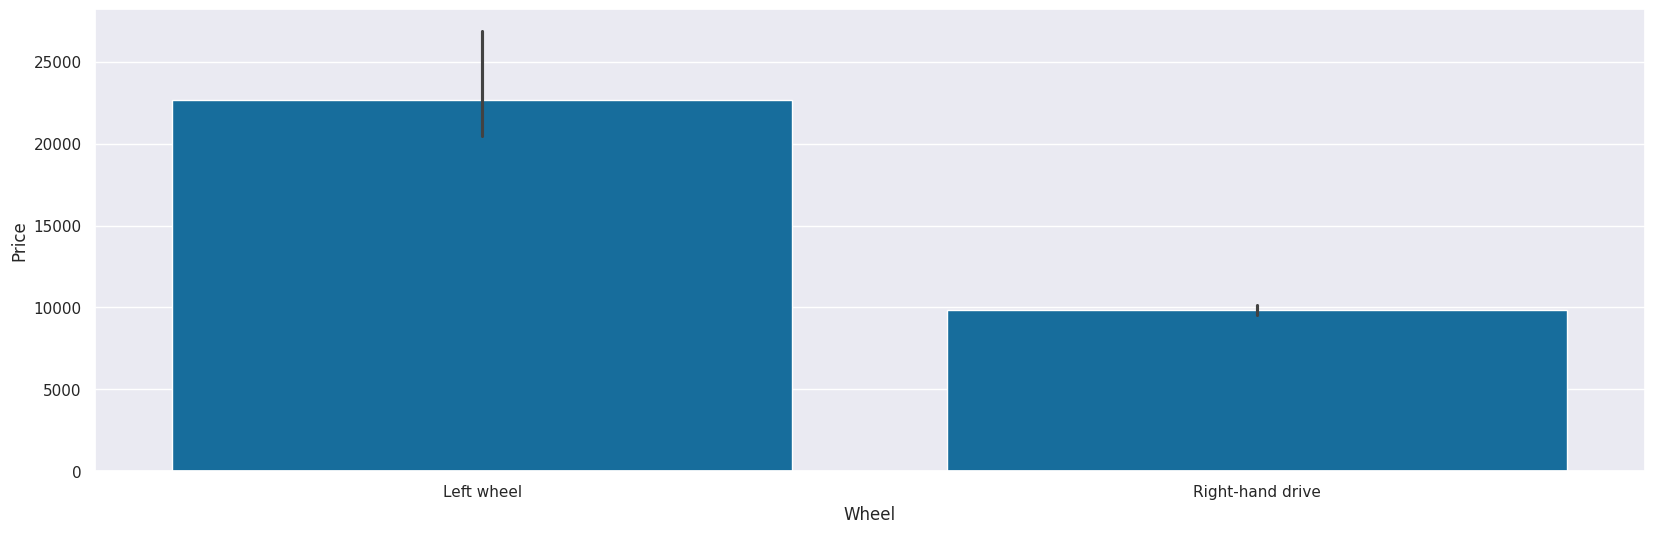

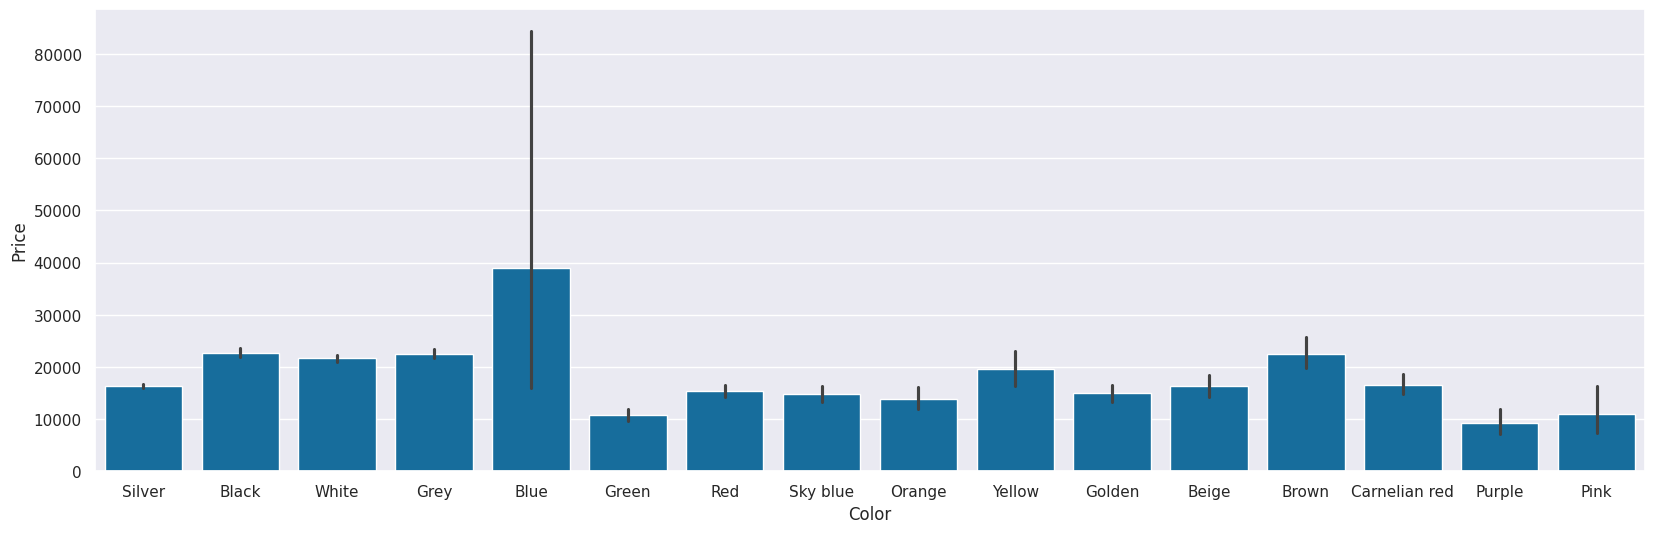

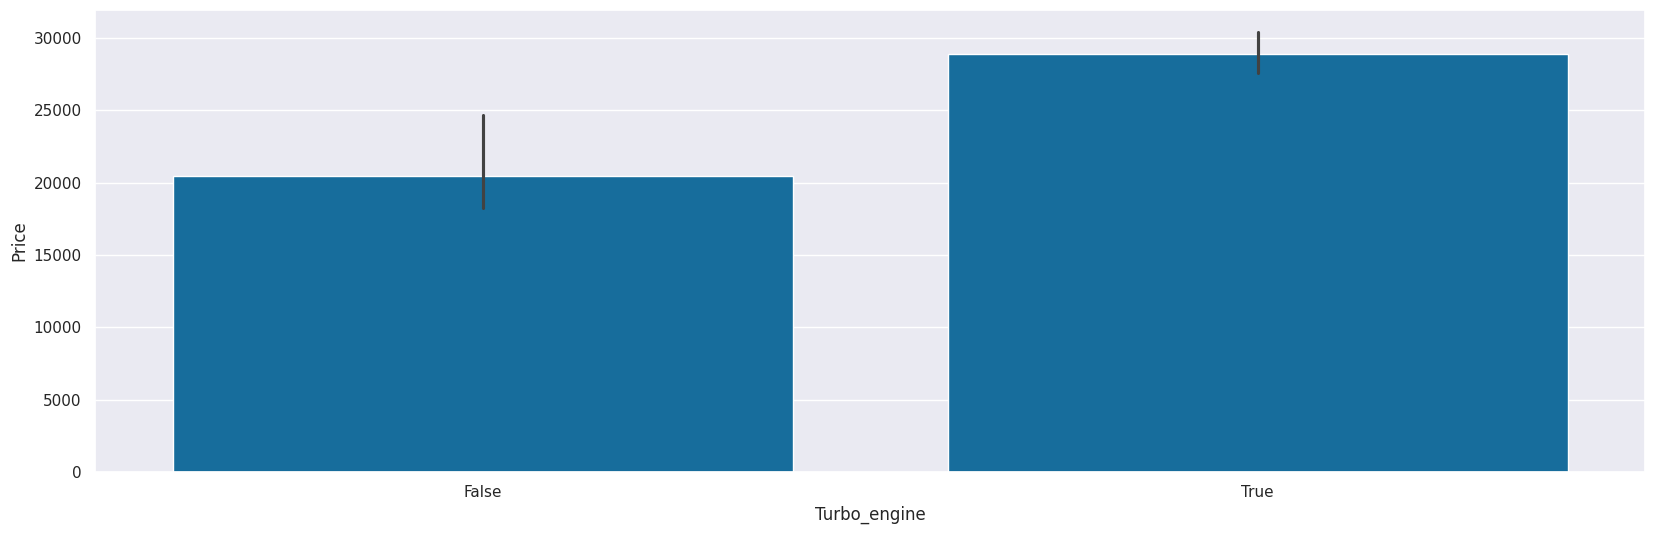

In [ ]:
# Plot the categorical variables
for col in categorical_col:
    plt.figure(figsize=(20,6))
    sns.barplot(x=data[col], y=data['Price'])

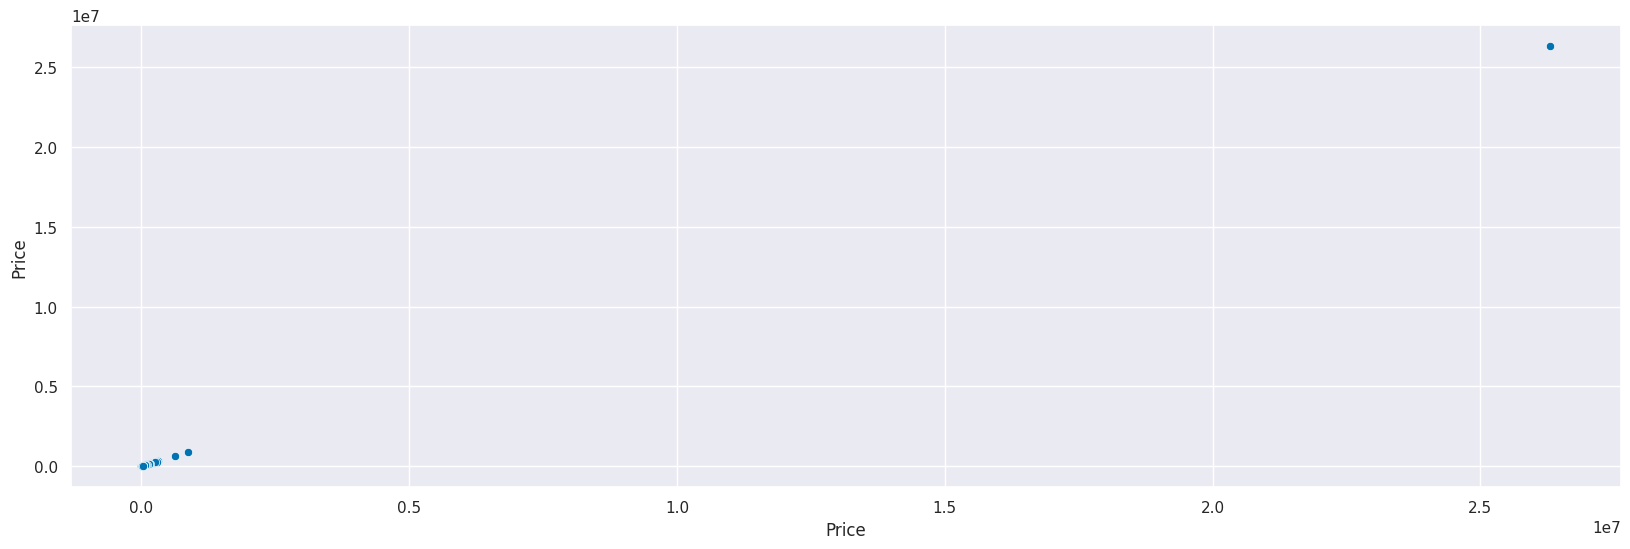

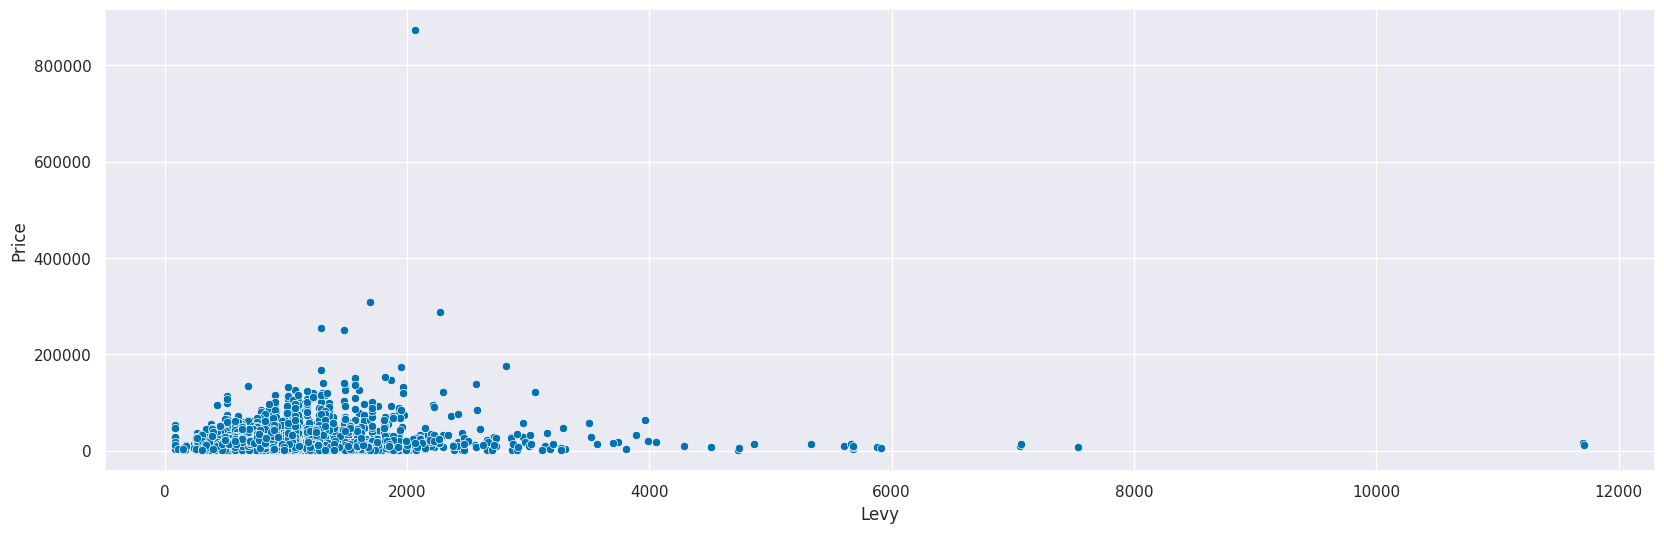

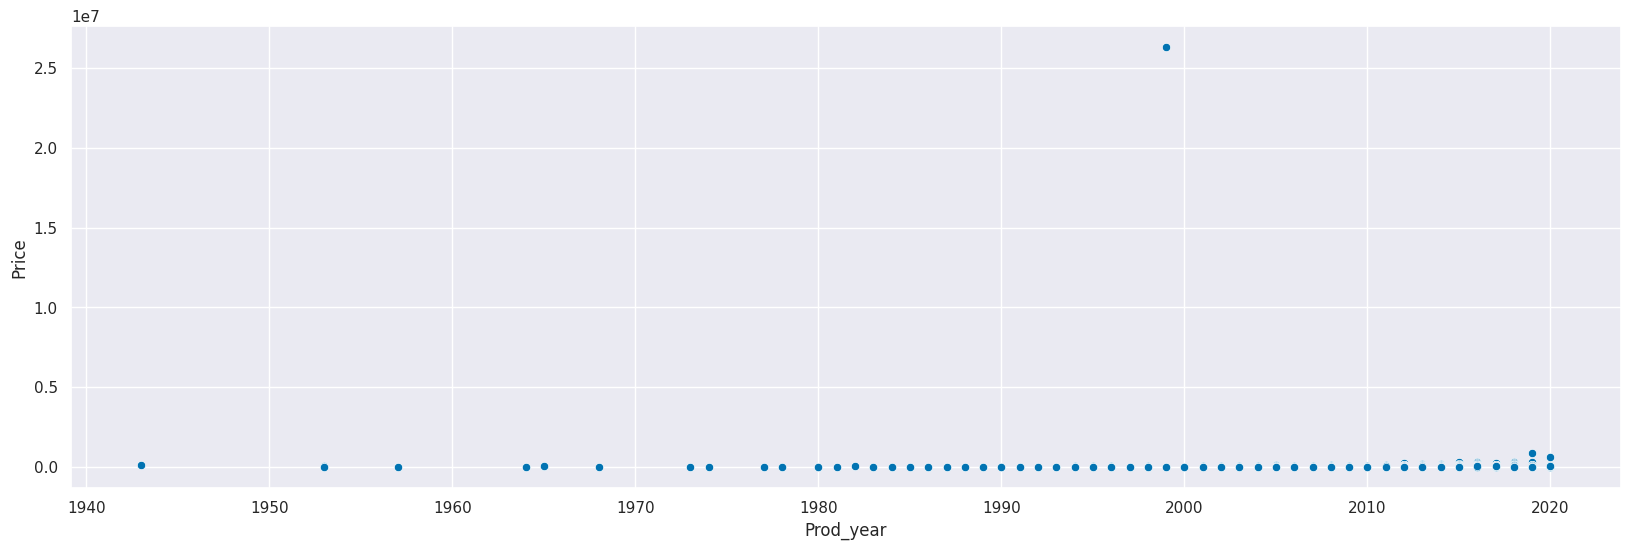

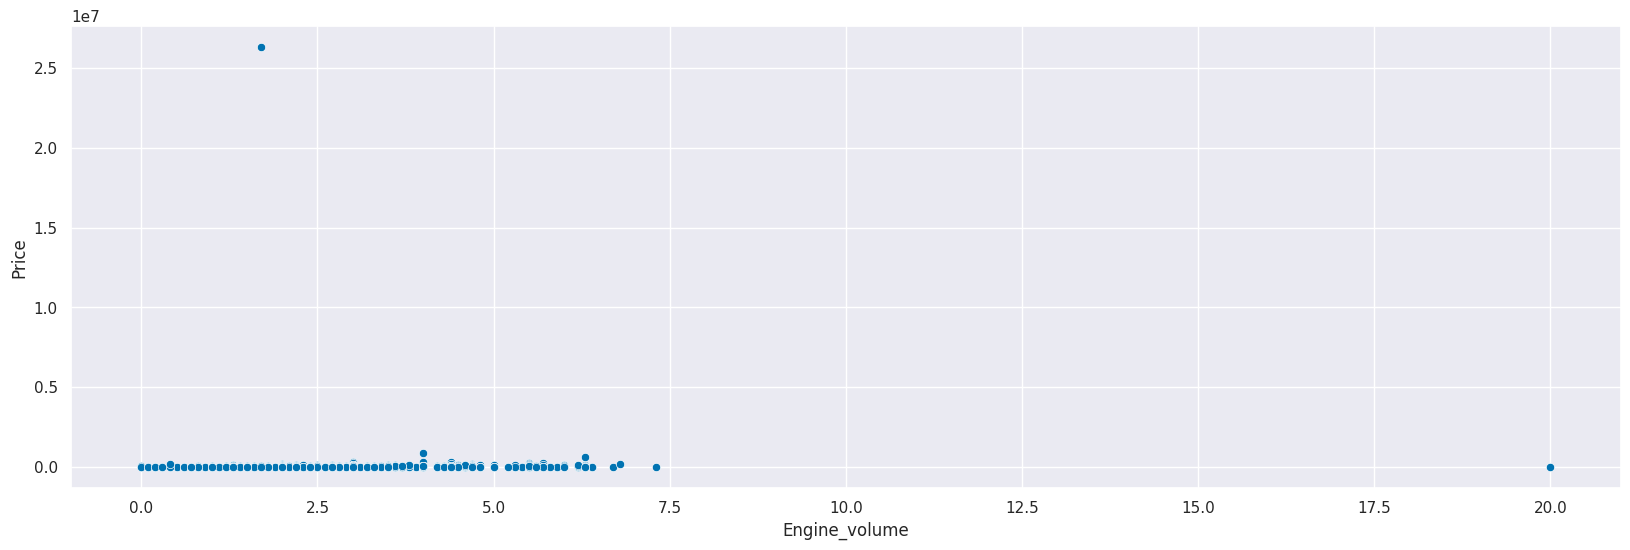

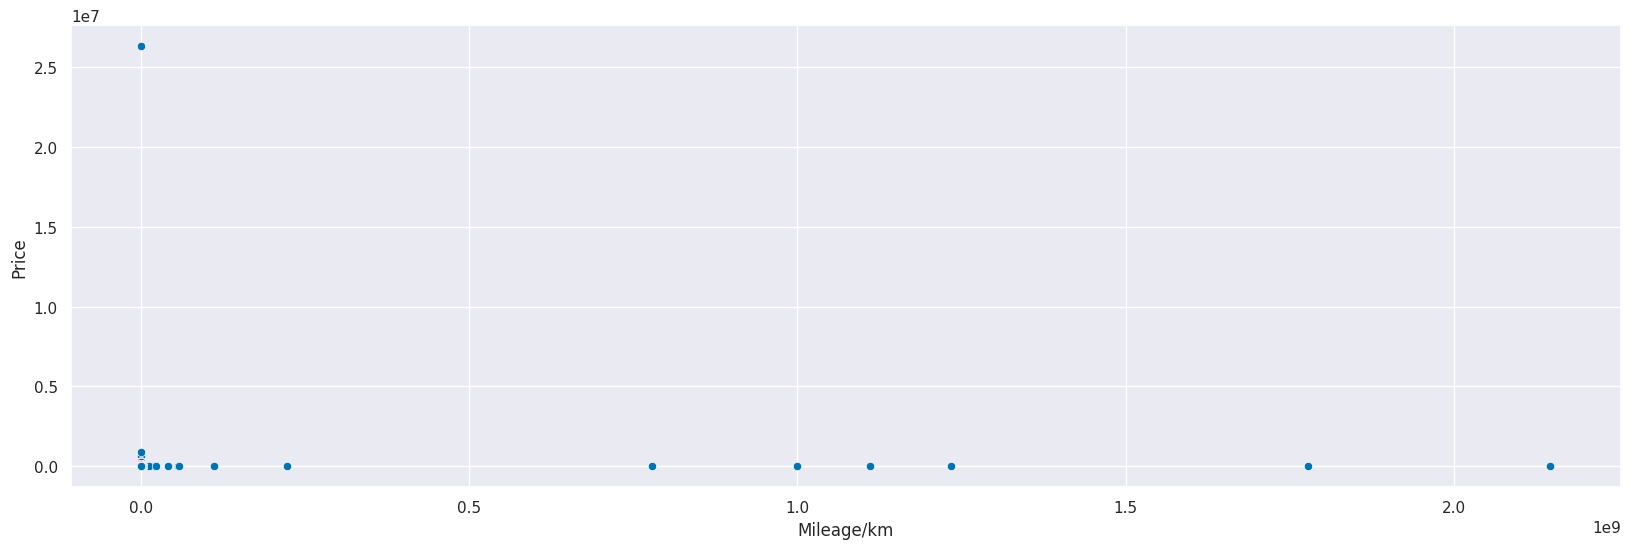

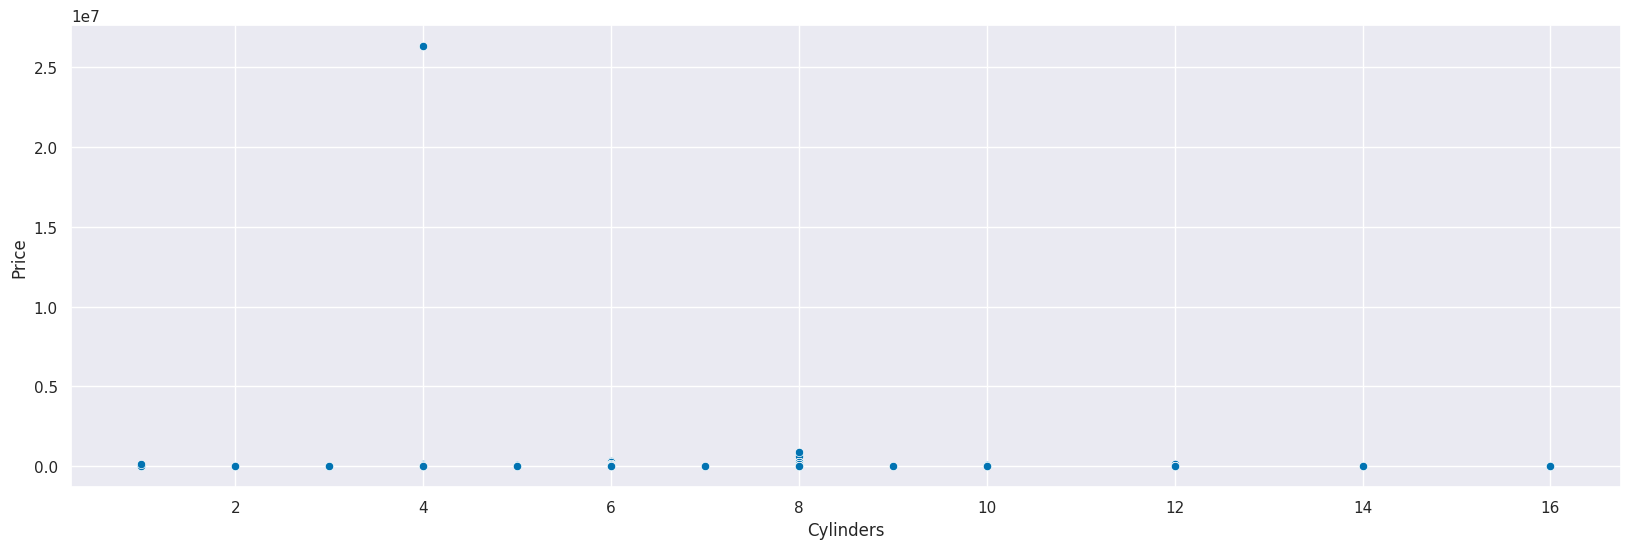

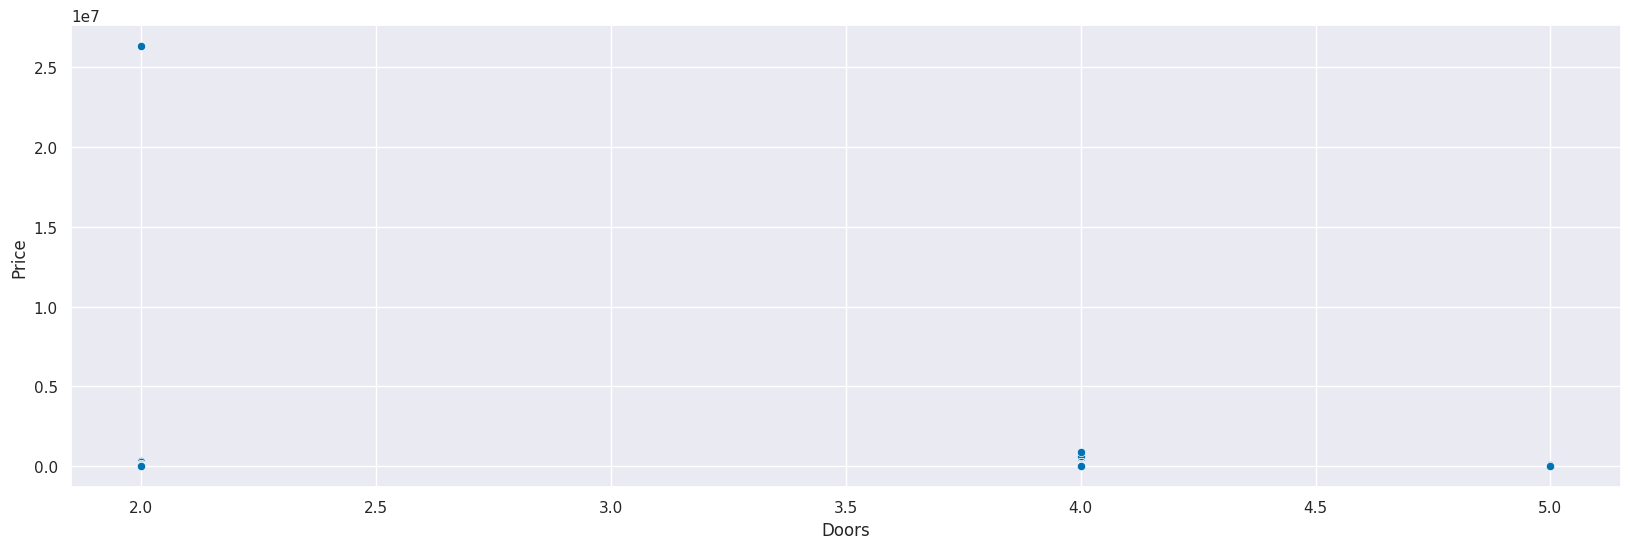

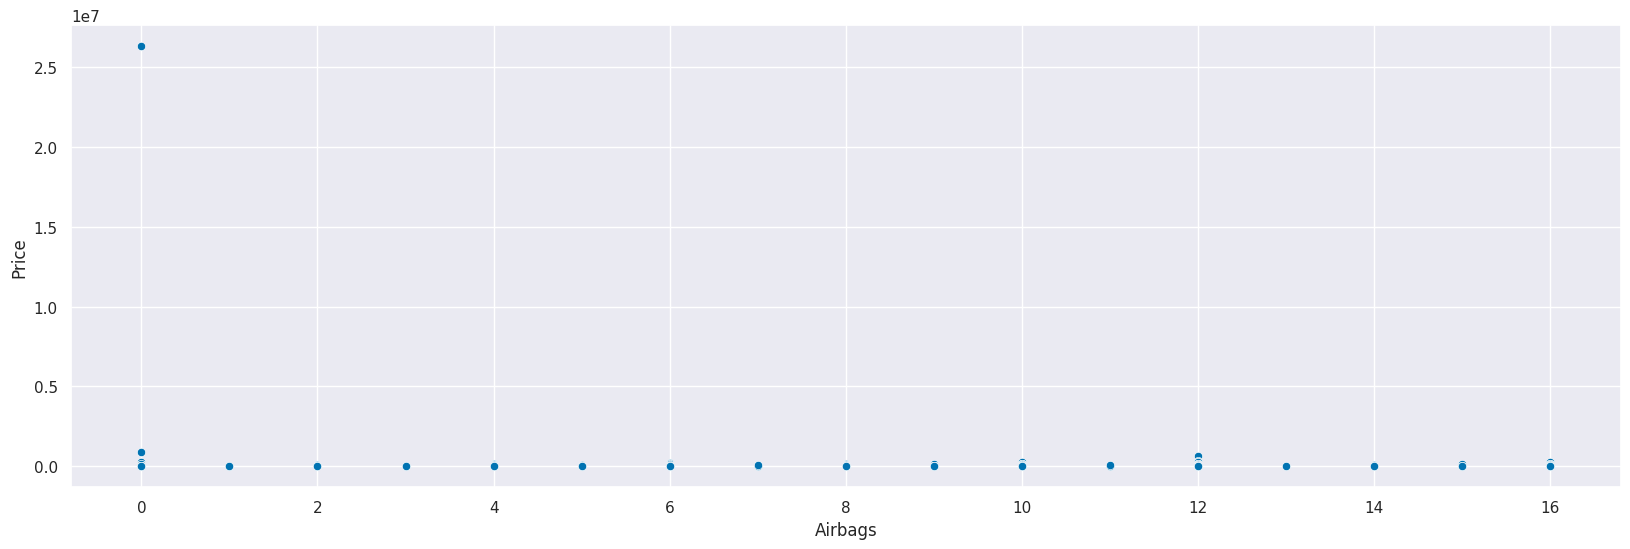

In [ ]:
# Plot the numerical variables
for col in numerical_col:
    plt.figure(figsize=(20,6))
    sns.scatterplot(x=data[col], y=data['Price'])

In [ ]:
# Separate target from predictors
y = data.Price
X = data.drop(['Price'], axis=1)

# split the data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
# Categorical_col
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10
                    and X_train_full[cname].dtype in ['object','boolean']]

# Numerical_col
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
categorical_cols

['Leather_interior', 'Fuel_type', 'Gear_box_type', 'Drive_wheels', 'Wheel']

In [ ]:
numerical_cols

['Levy',
 'Prod_year',
 'Engine_volume',
 'Mileage/km',
 'Cylinders',
 'Doors',
 'Airbags']

In [ ]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
# create the  pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('The mean absolute error is:', score)

# Preprocessing of test data, fit model
preds_test = my_pipeline.predict(X_valid_full)

The mean absolute error is: 15822.130479329006


In [ ]:
# we will create many models with different parametrs
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]


def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    my_pipeline.fit(X_train, y_train)
    preds = my_pipeline.predict(X_valid)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("The Model %d has a MAE: %d" % (i+1, mae))

The Model 1 has a MAE: 15787
The Model 2 has a MAE: 15822
The Model 3 has a MAE: 8531
The Model 4 has a MAE: 9144
The Model 5 has a MAE: 17514


In [ ]:
# create the pipeline
my_pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_3)
                             ])

# Preprocessing of training data, fit model
my_pipeline_2.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds_2 = my_pipeline.predict(X_valid)

In [ ]:
# Evaluate the model
score_2 = mean_absolute_error(y_valid, preds_2)
print('MAE:', score_2)
# Preprocessing of test data, fit model
preds_test_2 = my_pipeline.predict(X_valid_full)

MAE: 15822.130479329006


In [ ]:
output_2 = pd.DataFrame({'Price': preds_test_2, 'real_price': y_valid})
output_2

,Price,real_price
13868,1.814679e+04,18189
13144,6.121095e+04,50150
9486,2.704490e+04,6429
6186,8.231333e+03,4547
4410,1.808905e+04,17249
11840,4.399474e+03,1098
14924,1.094489e+04,10036
6981,2.747720e+04,20228
18340,8.067750e+03,7213
9657,1.445915e+04,13172
